<a href="https://colab.research.google.com/github/swjh9523/Python_Tutorial/blob/master/%EA%B0%95%EC%9B%90%EB%8F%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


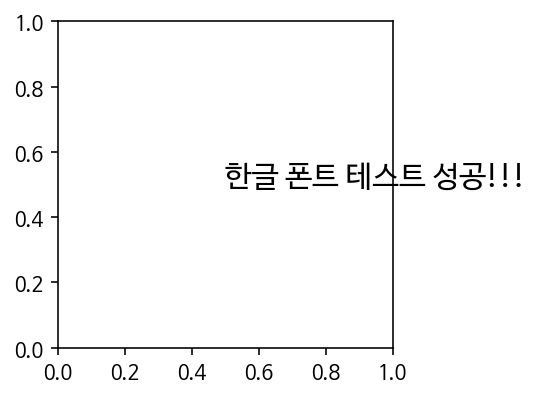

In [4]:
# 그래프 한글폰트 사용설정 in Colab
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [5]:
data = pd.read_csv('/content/drive/MyDrive/데이터파일/강원도_강원상품권사용점 현황_20200901.csv',encoding='cp949')

In [25]:
data.head()

,시도,시군구명,업체명,업종코드,세부업종,연락처,소재지주소
0,강원도,고성군,GS25 대진항점,마트/편의점,편의점,NaN,강원도 고성군 현내면 한나루로 122
1,강원도,고성군,세븐일레븐,마트/편의점,편의점,NaN,강원도 고성군 간성읍 간성로 39-2
2,강원도,횡성군,해피비움,숙박 및 음식점업,커피음료점,NaN,강원도 횡성군 둔내면 둔내로 40
3,강원도,철원군,IM헤어,스포츠 등 기타 서비스업,"미용실,미용자재판매",NaN,강원도 철원군 철원읍 금학로 272
4,강원도,춘천시,진이식당,숙박 및 음식점업,일반음식점,NaN,강원도 춘천시 영서로 2352-20(온의동)


In [ ]:
data = data[~(data['시도'] == '경기도')]

In [ ]:
# 5대 외에는 기타로 합치기
data_region = data['시군구명'].value_counts()
data_region

강릉시    4259
원주시    4240
춘천시    3483
동해시    1635
삼척시    1524
홍천군    1206
속초시    1155
횡성군    1089
철원군    1084
인제군     958
평창군     956
정선군     883
영월군     863
화천군     677
태백시     608
양구군     582
고성군     565
양양군     538
Name: 시군구명, dtype: int64

In [ ]:
data['시군구명'].value_counts()[:5].index

Index(['강릉시', '원주시', '춘천시', '동해시', '삼척시'], dtype='object')

In [ ]:
g = data['시군구명'].value_counts()[:5].index

In [ ]:
data.head()

,시도,시군구명,업체명,업종코드,세부업종,연락처,소재지주소
0,강원도,고성군,GS25 대진항점,마트/편의점,편의점,NaN,강원도 고성군 현내면 한나루로 122
1,강원도,고성군,세븐일레븐,마트/편의점,편의점,NaN,강원도 고성군 간성읍 간성로 39-2
2,강원도,횡성군,해피비움,숙박 및 음식점업,커피음료점,NaN,강원도 횡성군 둔내면 둔내로 40
3,강원도,철원군,IM헤어,스포츠 등 기타 서비스업,"미용실,미용자재판매",NaN,강원도 철원군 철원읍 금학로 272
4,강원도,춘천시,진이식당,숙박 및 음식점업,일반음식점,NaN,강원도 춘천시 영서로 2352-20(온의동)


In [ ]:
labels = temp_top5.index

In [ ]:
temp = data['세부업종'].value_counts()
temp_top5 = temp[temp>800]

In [ ]:
df = pd.DataFrame(temp).reset_index()
df.columns = ['세부업종','점포수']
df

,세부업종,점포수
0,일반음식점,11703
1,옷가게,1367
2,슈퍼마켓,855
3,커피음료점,852
4,"미용실,미용자재판매",847
...,...,...
73,"세무,법무,노무사",6
74,"장례용품,장례업",6
75,"설계,컨설팅",5
76,통신판매업,5


In [ ]:
df_top5 = df.sort_values(by='점포수',ascending=False)[:5]
df_etc = df.sort_values(by='점포수',ascending=False)[5:]

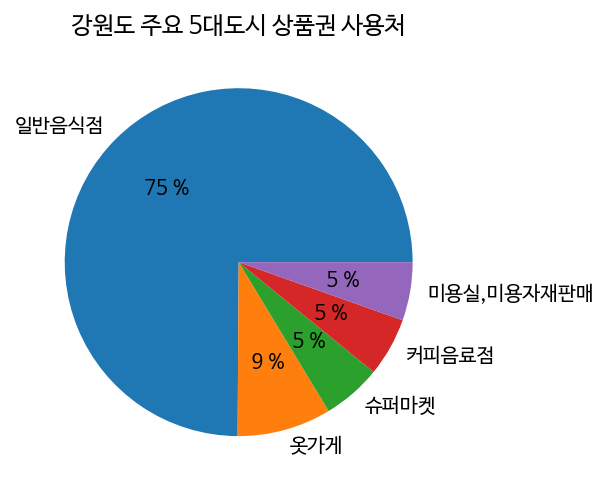

In [ ]:
plt.figure(figsize=(15,4))
plt.title('강원도 주요 5대도시 상품권 사용처')
g = plt.pie(temp_top5,labels=labels, autopct='% 1.f %%')

In [ ]:
data['시군구명'].value_counts()[:5].index
data_count = data['시군구명'].value_counts()

Index(['강릉시', '원주시', '춘천시', '동해시', '삼척시'], dtype='object')

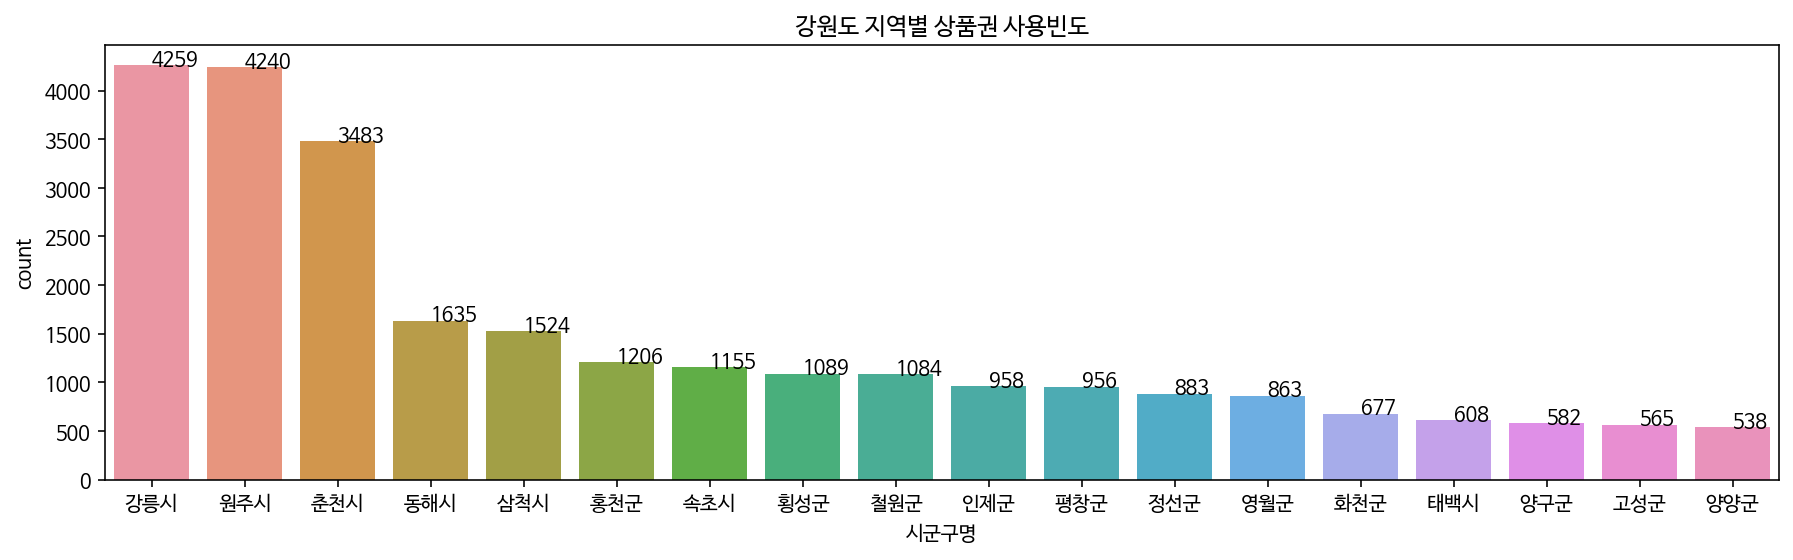

In [ ]:
plt.figure(figsize=(15,4))
plt.title('강원도 지역별 상품권 사용빈도')
f=sns.countplot(data=data, x='시군구명',order=data['시군구명'].value_counts().index)
for i, val in enumerate(data_count.index):
    f.text(x=i, y=data_count[i], s=data_count[i])

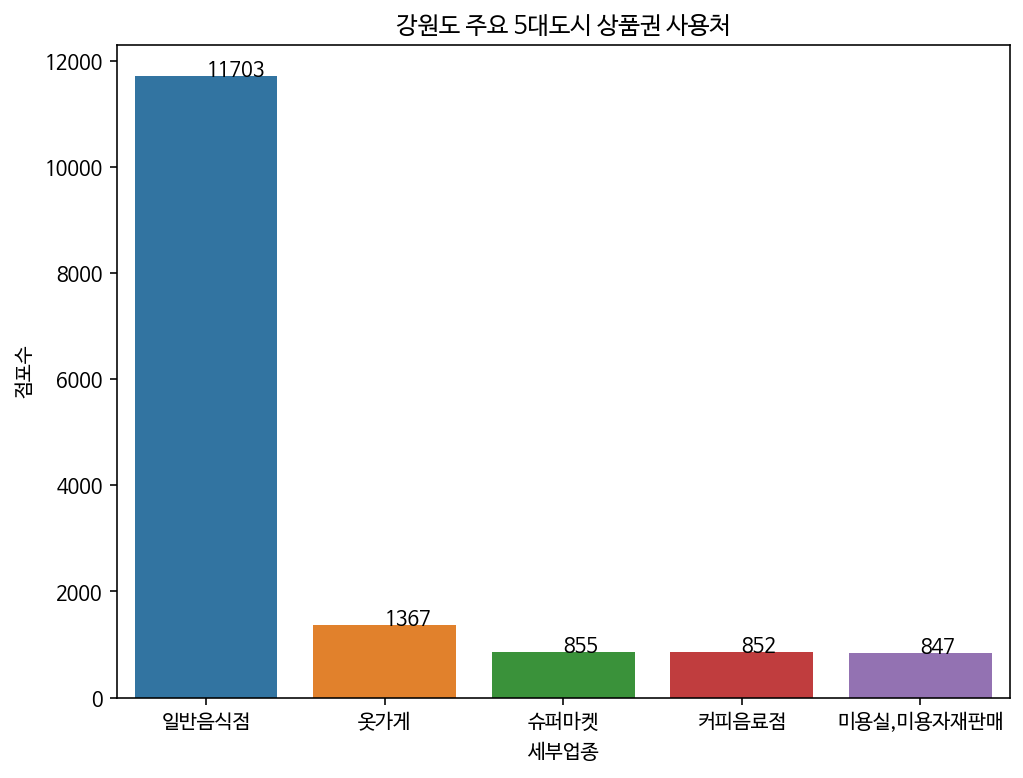

In [ ]:
plt.figure(figsize=(8,6))
plt.title('강원도 주요 5대도시 상품권 사용처')
g = sns.barplot(data=df_top5, x='세부업종',y='점포수')
for i, val in enumerate(df_count.index):
    g.text(x=i, y=df_count[i], s=df_count[i])